In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
staff_schedule = pd.read_csv('staff_schedule.csv')
patient_data = pd.read_csv('patient_dataset(1).csv')
facility_usage = pd.read_csv('facility_usage.csv')

In [ ]:
patient_data.columns

Index(['patient_id', 'date_column', 'age', 'gender', 'reason_for_visit',
       'outcome', 'wait_time_minutes'],
      dtype='object')

In [ ]:
# change the date variable as datetime
staff_schedule['date'] = pd.to_datetime(staff_schedule['date'])
patient_data['date'] = pd.to_datetime(patient_data['date_column'])
facility_usage['date'] = pd.to_datetime(facility_usage['date'])

# remove the date_column from patient_data
patient_data.drop('date_column', axis = 1, inplace = True)

In [ ]:
print("staff_schedule:\n", staff_schedule)
print("\npatient_data:\n", patient_data)
print("\nfacility_usage:\n", facility_usage)

staff_schedule:
            date           role  available_staff
0    2023-01-01         Doctor                8
1    2023-01-01          Nurse               10
2    2023-01-01  Support Staff                7
3    2023-01-02         Doctor                5
4    2023-01-02          Nurse               12
...         ...            ...              ...
1090 2023-12-30          Nurse                8
1091 2023-12-30  Support Staff               10
1092 2023-12-31         Doctor               12
1093 2023-12-31          Nurse               12
1094 2023-12-31  Support Staff                9

[1095 rows x 3 columns]

patient_data:
      patient_id  age  gender reason_for_visit      outcome  wait_time_minutes  \
0            13   23    Male           Injury     Admitted                 16   
1            99   52  Female        Emergency     Admitted                 30   
2           106   14  Female           Injury   Discharged                141   
3           314   88  Female        Follow

In [ ]:
df = [staff_schedule, patient_data, facility_usage]
# check the null values in either
for i in df:
  print(i.isnull().sum())

date               0
role               0
available_staff    0
dtype: int64
patient_id           0
age                  0
gender               0
reason_for_visit     0
outcome              0
wait_time_minutes    0
date                 0
dtype: int64
date           0
equipment      0
usage_hours    0
dtype: int64


In [ ]:
for i in df:
  print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1095 non-null   datetime64[ns]
 1   role             1095 non-null   object        
 2   available_staff  1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   patient_id         365 non-null    int64         
 1   age                365 non-null    int64         
 2   gender             365 non-null    object        
 3   reason_for_visit   365 non-null    object        
 4   outcome            365 non-null    object        
 5   wait_time_minutes  365 non-null    int64         
 6   date 

In [ ]:
for i in df:
  print(i.describe())

                      date  available_staff
count                 1095      1095.000000
mean   2023-07-02 00:00:00         9.484018
min    2023-01-01 00:00:00         5.000000
25%    2023-04-02 00:00:00         7.000000
50%    2023-07-02 00:00:00         9.000000
75%    2023-10-01 00:00:00        12.000000
max    2023-12-31 00:00:00        14.000000
std                    NaN         2.843491
       patient_id         age  wait_time_minutes  \
count  365.000000  365.000000         365.000000   
mean   183.000000   48.676712          88.665753   
min      1.000000    0.000000           6.000000   
25%     92.000000   23.000000          43.000000   
50%    183.000000   50.000000          85.000000   
75%    274.000000   74.000000         134.000000   
max    365.000000   99.000000         179.000000   
std    105.510663   29.722242          51.446473   

                                date  
count                            365  
mean   2023-01-29 15:27:07.397260544  
min              2

In [ ]:
# Group by Date to get daily patient inflow
daily_patient_inflow = patient_data.groupby('date').size().reset_index(name='Patient_Count')
daily_patient_inflow

,date,Patient_Count
0,2023-01-01,5
1,2023-01-02,12
2,2023-01-03,7
3,2023-01-04,3
4,2023-01-05,7
5,2023-01-06,5
6,2023-01-07,4
7,2023-01-08,8
8,2023-01-09,7
9,2023-01-10,6


In [ ]:
# Extracting additional features
daily_patient_inflow['Day_of_Week'] = daily_patient_inflow['date'].dt.dayofweek
daily_patient_inflow['Month'] = daily_patient_inflow['date'].dt.month
daily_patient_inflow['Year'] = daily_patient_inflow['date'].dt.year

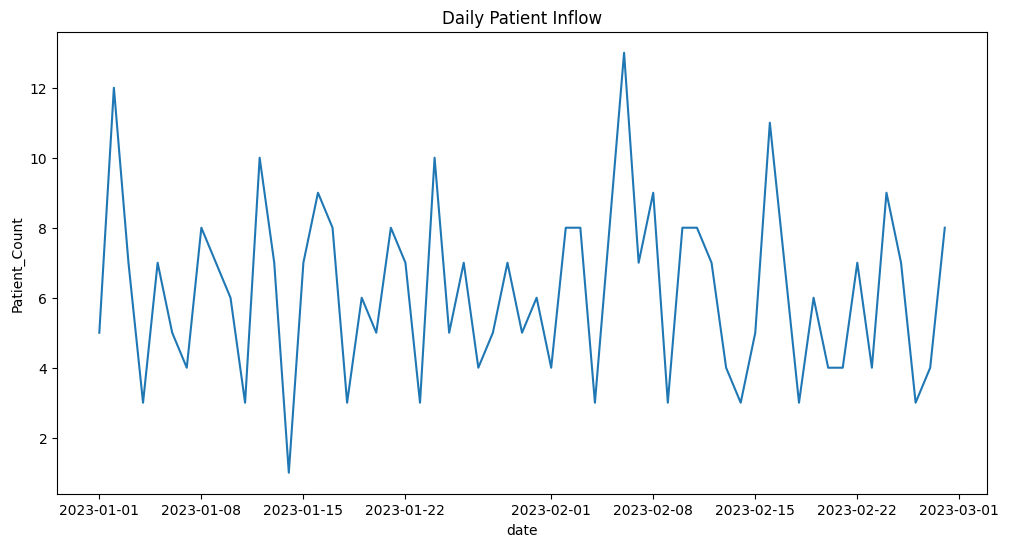

In [ ]:
# Plot daily patient inflow
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_patient_inflow, x='date', y='Patient_Count')
plt.title('Daily Patient Inflow')
plt.show()



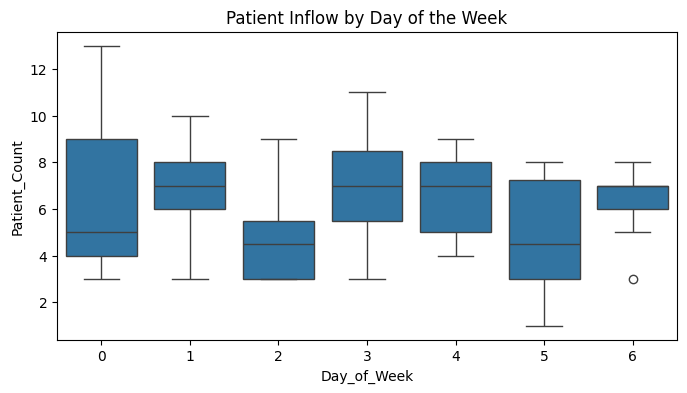

In [ ]:
# Analyze patient inflow by day of the week
plt.figure(figsize=(8, 4))
sns.boxplot(data=daily_patient_inflow, x='Day_of_Week', y='Patient_Count')
plt.title('Patient Inflow by Day of the Week')
plt.show()

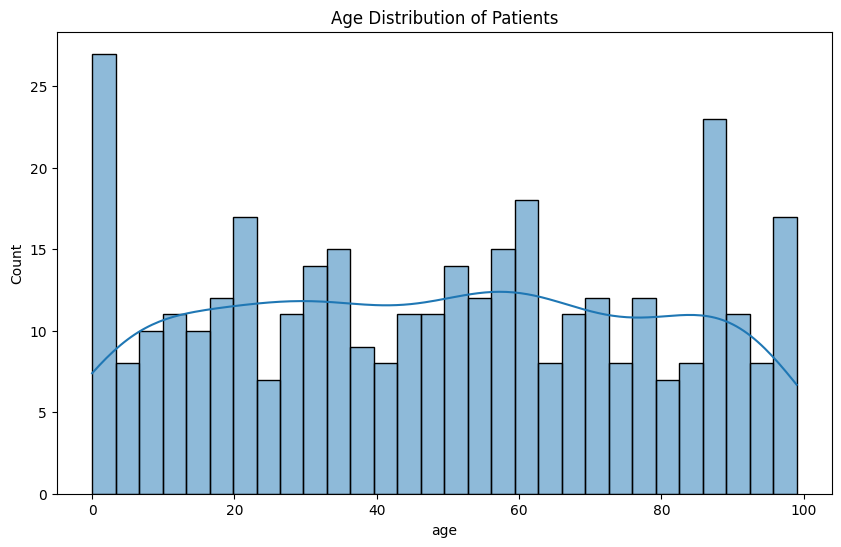

In [ ]:
# Analyze the age with the patient count using boxplot
plt.figure(figsize=(10, 6))
sns.histplot(data=patient_data, x='age', bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

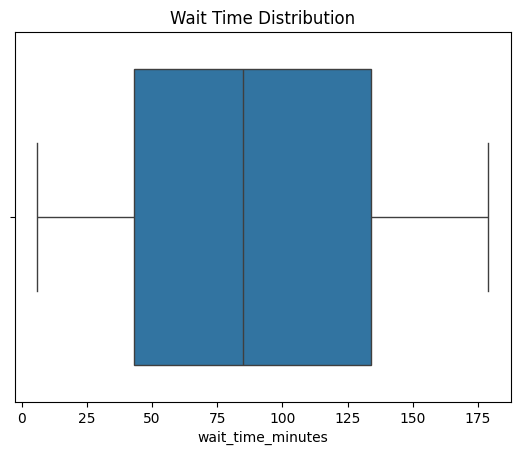

In [ ]:
## Anomaly Detection
sns.boxplot(x=patient_data['wait_time_minutes'])
plt.title('Wait Time Distribution')
plt.show()

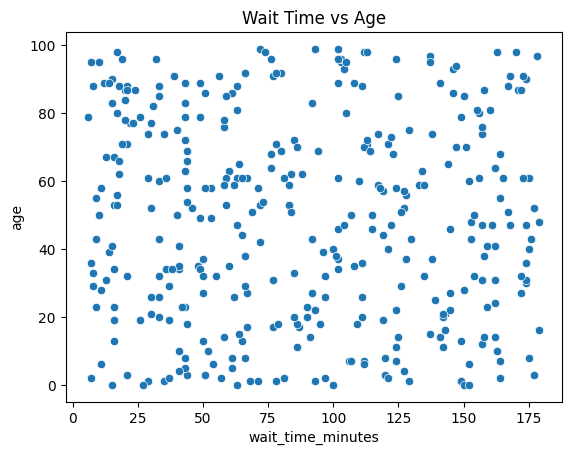

In [ ]:
## Cross-Analysis
sns.scatterplot(x=patient_data['wait_time_minutes'], y=patient_data['age'])
plt.title('Wait Time vs Age')
plt.show()

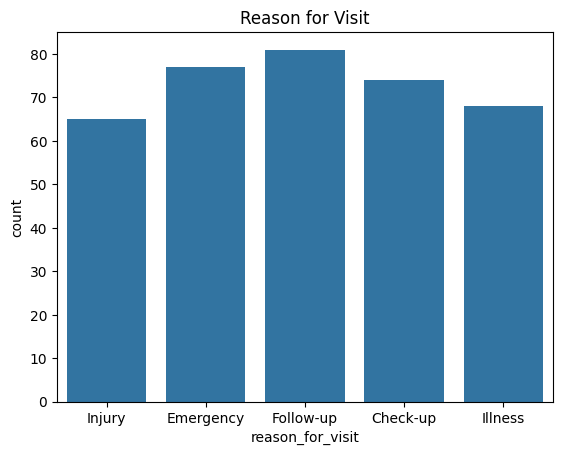

In [ ]:
# Reason for Visit distribution
sns.countplot(x='reason_for_visit', data=patient_data)
plt.title('Reason for Visit')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust p, d, q as needed)
model = ARIMA(daily_patient_inflow['Patient_Count'], order=(3, 1, 0))
model_fit = model.fit()

# Forecast future patient inflow
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

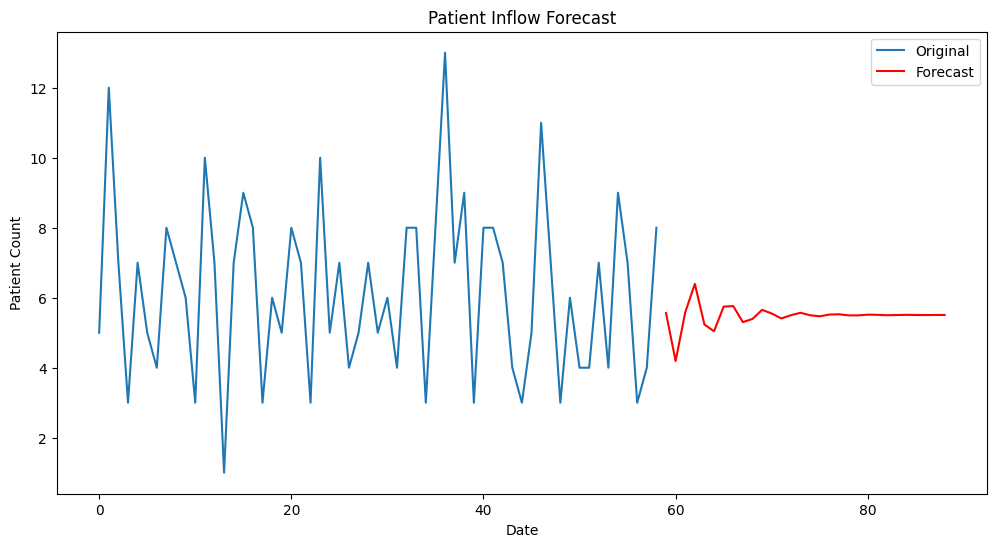

In [ ]:
# evaluate the model
plt.figure(figsize = (12, 6))
plt.plot(daily_patient_inflow['Patient_Count'], label = 'Original')
plt.plot(forecast, label = 'Forecast', color = 'red')
plt.title('Patient Inflow Forecast')
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract the relevant portion of the original data for comparison
original_values = daily_patient_inflow['Patient_Count'][-forecast_steps:]  # Last 'forecast_steps' values

mae = mean_absolute_error(original_values, forecast)
rmse = np.sqrt(mean_squared_error(original_values, forecast))


print("MAE:", mae)
print("RMSE:", rmse)

MAE: 2.2122958097308296
RMSE: 2.5933130727549094


In [ ]:
# Let's say you want to forecast for a new date
future_dates = pd.date_range(start='2023-03-01', periods=30, freq='D')  # Example: forecasting next 10 days
forecast = model_fit.get_forecast(steps=len(future_dates))
forecast_values = forecast.predicted_mean


In [ ]:
# Print forecasted values
for date, value in zip(future_dates, forecast_values):
    print(f"predicted patient count for {date} is {round(value)}.")

predicted patient count for 2023-03-01 00:00:00 is 6.
predicted patient count for 2023-03-02 00:00:00 is 4.
predicted patient count for 2023-03-03 00:00:00 is 6.
predicted patient count for 2023-03-04 00:00:00 is 6.
predicted patient count for 2023-03-05 00:00:00 is 5.
predicted patient count for 2023-03-06 00:00:00 is 5.
predicted patient count for 2023-03-07 00:00:00 is 6.
predicted patient count for 2023-03-08 00:00:00 is 6.
predicted patient count for 2023-03-09 00:00:00 is 5.
predicted patient count for 2023-03-10 00:00:00 is 5.
predicted patient count for 2023-03-11 00:00:00 is 6.
predicted patient count for 2023-03-12 00:00:00 is 6.
predicted patient count for 2023-03-13 00:00:00 is 5.
predicted patient count for 2023-03-14 00:00:00 is 6.
predicted patient count for 2023-03-15 00:00:00 is 6.
predicted patient count for 2023-03-16 00:00:00 is 5.
predicted patient count for 2023-03-17 00:00:00 is 5.
predicted patient count for 2023-03-18 00:00:00 is 6.
predicted patient count for 

In [ ]:
# make a daily_counts variable
daily_counts = patient_data.groupby(['date', 'reason_for_visit']).size().reset_index(name='Patient_Count')
daily_counts

,date,reason_for_visit,Patient_Count
0,2023-01-01,Emergency,2
1,2023-01-01,Follow-up,1
2,2023-01-01,Injury,2
3,2023-01-02,Check-up,2
4,2023-01-02,Emergency,2
...,...,...,...
203,2023-02-27,Injury,1
204,2023-02-28,Check-up,1
205,2023-02-28,Emergency,3
206,2023-02-28,Follow-up,3


### 1\. Analyzing Staff Availability vs. Patient Inflow

**Goal**: Identify patterns where staff availability might be insufficient based on patient inflow.


In [ ]:
# Aggregate patient data by date
daily_patient_inflow = patient_data.groupby('date').size().reset_index(name='Patient_Count')
daily_patient_inflow

,date,Patient_Count
0,2023-01-01,5
1,2023-01-02,12
2,2023-01-03,7
3,2023-01-04,3
4,2023-01-05,7
5,2023-01-06,5
6,2023-01-07,4
7,2023-01-08,8
8,2023-01-09,7
9,2023-01-10,6


Calculate the average number of patients per staff member for each day and identify days with high patient-to-staff ratios.

In [ ]:
# Merge the patient count data with staff schedule
merged_data = daily_patient_inflow.merge(staff_schedule, on='date', how='left')
print(merged_data)

          date  Patient_Count           role  available_staff
0   2023-01-01              5         Doctor                8
1   2023-01-01              5          Nurse               10
2   2023-01-01              5  Support Staff                7
3   2023-01-02             12         Doctor                5
4   2023-01-02             12          Nurse               12
..         ...            ...            ...              ...
172 2023-02-27              4          Nurse                7
173 2023-02-27              4  Support Staff               14
174 2023-02-28              8         Doctor               10
175 2023-02-28              8          Nurse                7
176 2023-02-28              8  Support Staff                6

[177 rows x 4 columns]


In [ ]:
# Calculate patient-to-staff ratio
merged_data['Patient_to_Staff_Ratio'] = merged_data['Patient_Count'] / merged_data['available_staff']
merged_data

,date,Patient_Count,role,available_staff,Patient_to_Staff_Ratio
0,2023-01-01,5,Doctor,8,0.625000
1,2023-01-01,5,Nurse,10,0.500000
2,2023-01-01,5,Support Staff,7,0.714286
3,2023-01-02,12,Doctor,5,2.400000
4,2023-01-02,12,Nurse,12,1.000000
...,...,...,...,...,...
172,2023-02-27,4,Nurse,7,0.571429
173,2023-02-27,4,Support Staff,14,0.285714
174,2023-02-28,8,Doctor,10,0.800000
175,2023-02-28,8,Nurse,7,1.142857


In [ ]:
# Filter days with high patient-to-staff ratios
high_ratio_threshold = merged_data['Patient_to_Staff_Ratio'].quantile(0.75)  # Example: top 25% as high ratio
high_ratio_days = merged_data[merged_data['Patient_to_Staff_Ratio'] > high_ratio_threshold]

print(high_ratio_days)

          date  Patient_Count           role  available_staff  \
3   2023-01-02             12         Doctor                5   
5   2023-01-02             12  Support Staff                9   
13  2023-01-05              7          Nurse                5   
21  2023-01-08              8         Doctor                6   
24  2023-01-09              7         Doctor                5   
34  2023-01-12             10          Nurse                7   
35  2023-01-12             10  Support Staff                8   
38  2023-01-13              7  Support Staff                5   
48  2023-01-17              8         Doctor                6   
70  2023-01-24             10          Nurse                8   
71  2023-01-24             10  Support Staff                5   
75  2023-01-26              7         Doctor                5   
76  2023-01-26              7          Nurse                6   
77  2023-01-26              7  Support Staff                5   
85  2023-01-29           

We can now identify days where the patient-to-staff ratio is high, which might indicate insufficient staffing.

<Axes: xlabel='date', ylabel='Patient_to_Staff_Ratio'>

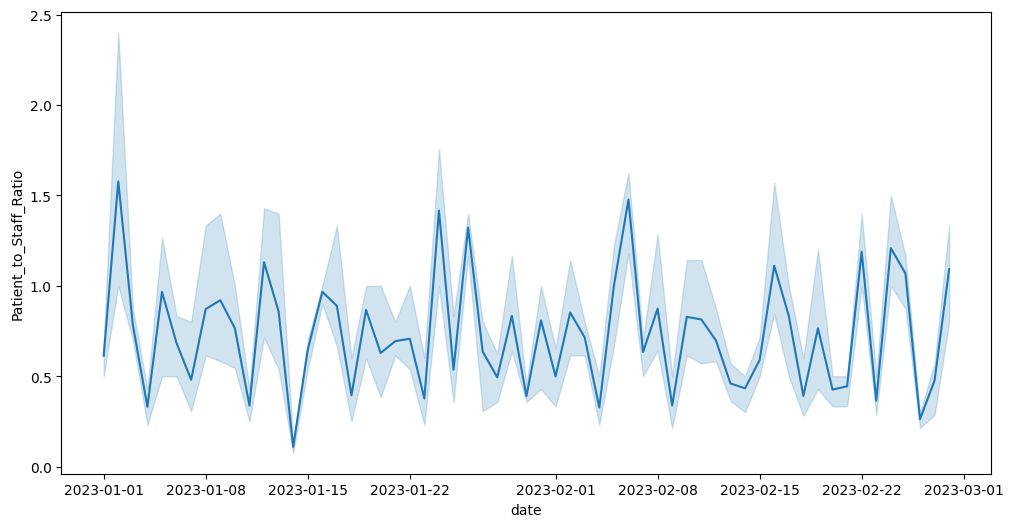

In [ ]:
# Plot patient-to-staff ratio over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='date', y='Patient_to_Staff_Ratio')


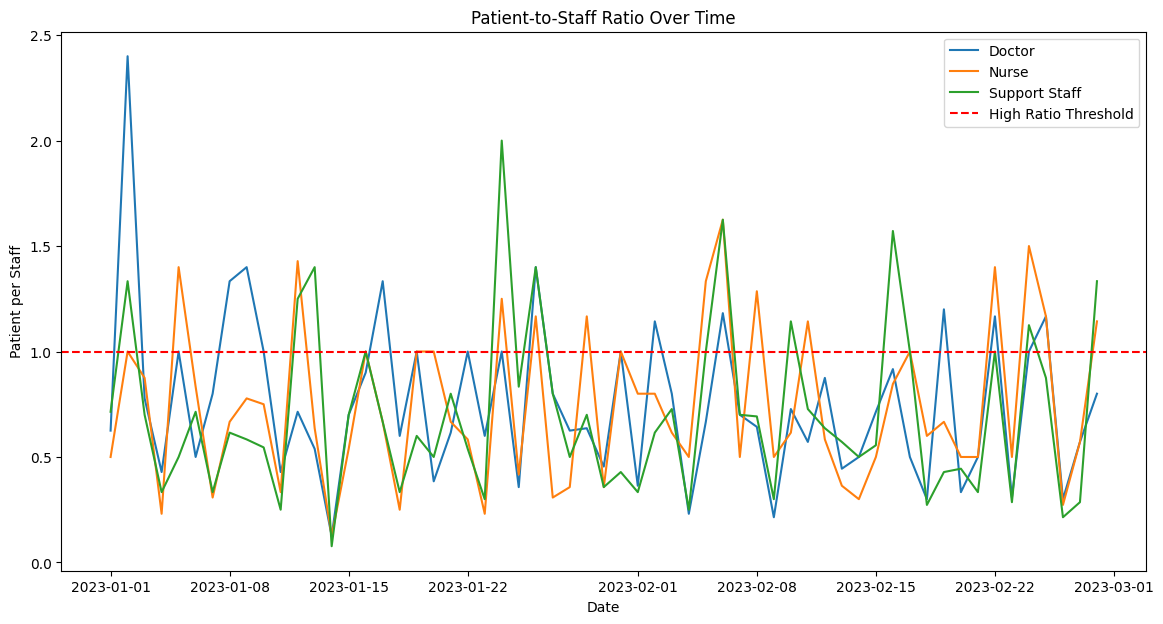

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='Patient_to_Staff_Ratio', data=merged_data, hue='role')
plt.axhline(high_ratio_threshold, color='red', linestyle='--', label='High Ratio Threshold')
plt.title('Patient-to-Staff Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Patient per Staff')
plt.legend()
plt.show()

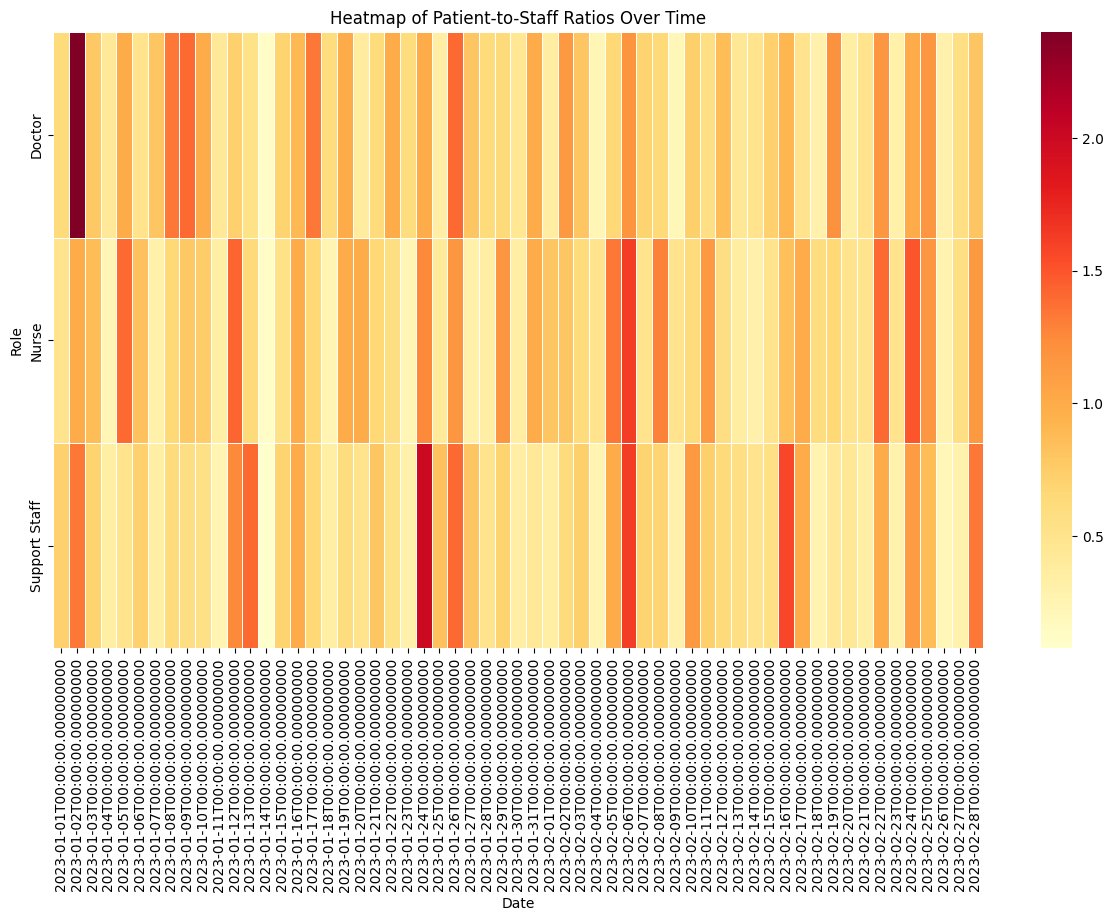

In [ ]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = merged_data.pivot(index = "role", columns="date", values="Patient_to_Staff_Ratio")

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor='white')

plt.title('Heatmap of Patient-to-Staff Ratios Over Time')
plt.xlabel('Date')
plt.ylabel('Role')
plt.show()

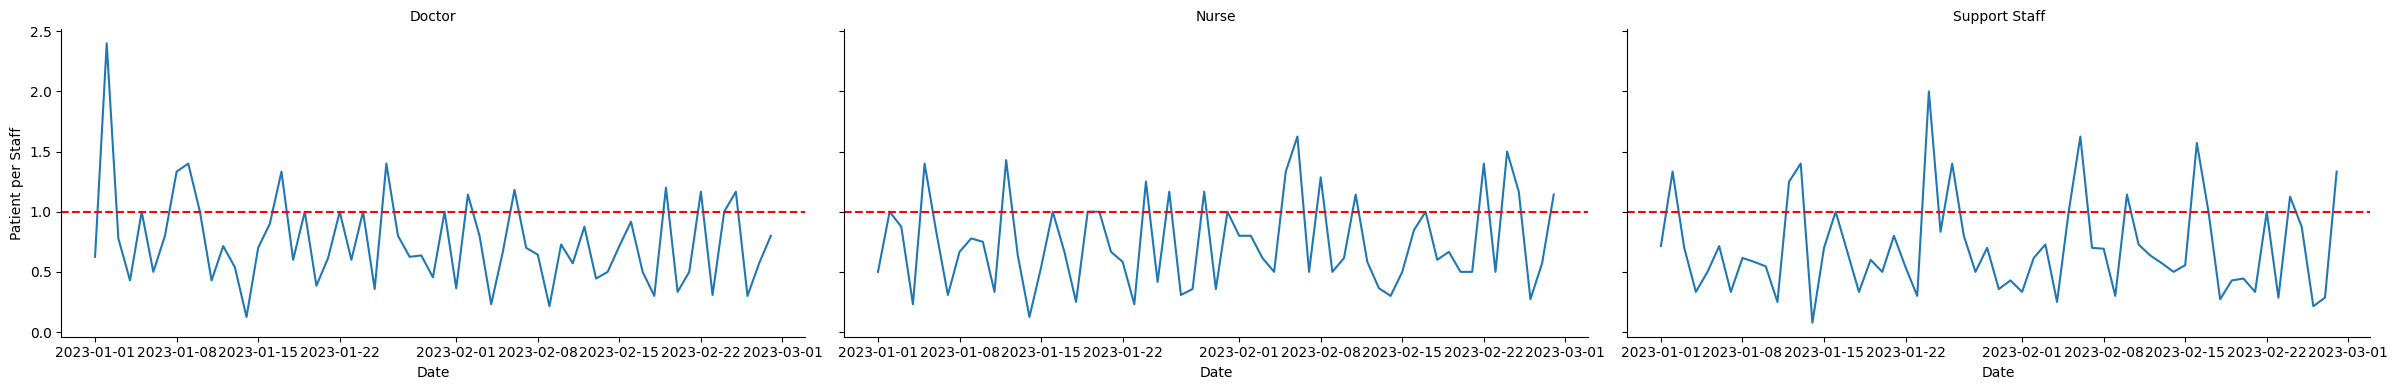

In [ ]:
# Create the FacetGrid
g = sns.FacetGrid(merged_data, col="role", col_wrap=3, height=4, aspect=2)
g = g.map(sns.lineplot, "date", "Patient_to_Staff_Ratio")

# Add a horizontal line for the high ratio threshold
for ax in g.axes.flat:
    ax.axhline(high_ratio_threshold, color='red', linestyle='--', label='High Ratio Threshold')

g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Patient per Staff")
plt.show()


### 2\. Wait Time Analysis

**Goal:** Determine factors that contribute to longer wait times.

Use regression analysis or correlation matrices to find significant contributors to wait times.

To analyze the impact of different factors on wait times, merge the datasets on the date column.

In [ ]:
# Merge patient data with staff schedule
merged_data1 = pd.merge(patient_data, staff_schedule, on='date', how='left')

# Merge the result with facility usage
merged_data1 = pd.merge(merged_data1, facility_usage, on='date', how='left')

merged_data1

,patient_id,age,gender,reason_for_visit,outcome,wait_time_minutes,date,role,available_staff,equipment,usage_hours
0,13,23,Male,Injury,Admitted,16,2023-01-01,Doctor,8,MRI,15
1,13,23,Male,Injury,Admitted,16,2023-01-01,Doctor,8,CT Scan,22
2,13,23,Male,Injury,Admitted,16,2023-01-01,Doctor,8,X-ray,20
3,13,23,Male,Injury,Admitted,16,2023-01-01,Doctor,8,Ultrasound,14
4,13,23,Male,Injury,Admitted,16,2023-01-01,Nurse,10,MRI,15
...,...,...,...,...,...,...,...,...,...,...,...
4375,337,16,Female,Emergency,Discharged,179,2023-02-28,Nurse,7,Ultrasound,3
4376,337,16,Female,Emergency,Discharged,179,2023-02-28,Support Staff,6,MRI,17
4377,337,16,Female,Emergency,Discharged,179,2023-02-28,Support Staff,6,CT Scan,16
4378,337,16,Female,Emergency,Discharged,179,2023-02-28,Support Staff,6,X-ray,12


In [ ]:
# Summary statistics for wait time
print(merged_data1['wait_time_minutes'].describe())


count    4380.000000
mean       88.665753
std        51.381816
min         6.000000
25%        43.000000
50%        85.000000
75%       134.000000
max       179.000000
Name: wait_time_minutes, dtype: float64


In [ ]:
# transform the numerical columns in standerdized manner
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['wait_time_minutes', 'age', 'available_staff', 'usage_hours']
merged_data1[numerical_columns] = scaler.fit_transform(merged_data1[numerical_columns])

In [ ]:
merged_data1[numerical_columns]

,wait_time_minutes,age,available_staff,usage_hours
0,-1.414392,-0.865075,-0.476655,0.465797
1,-1.414392,-0.865075,-0.476655,1.478443
2,-1.414392,-0.865075,-0.476655,1.189115
3,-1.414392,-0.865075,-0.476655,0.321133
4,-1.414392,-0.865075,0.227714,0.465797
...,...,...,...,...
4375,1.758298,-1.100912,-0.828840,-1.270167
4376,1.758298,-1.100912,-1.181025,0.755124
4377,1.758298,-1.100912,-1.181025,0.610461
4378,1.758298,-1.100912,-1.181025,0.031806


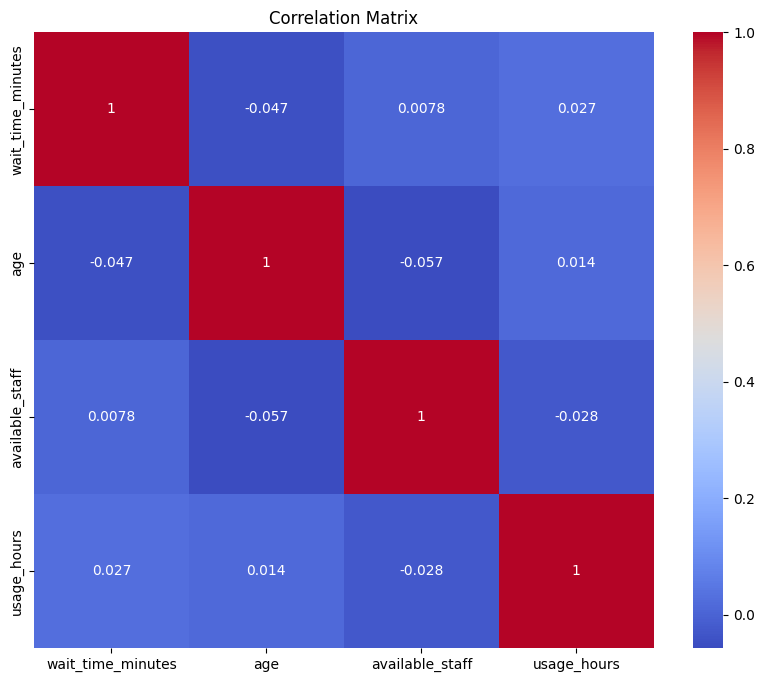

In [ ]:
# Select numerical columns for correlation

correlation_matrix = merged_data1[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Analyze Factors Contributing to Wait Time
 Regression Analysis

Linear regression can help quantify the relationship between wait_time_minutes and various factors.

In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Select relevant features
X = merged_data1[['age', 'available_staff', 'usage_hours']]
y = merged_data1['wait_time_minutes']

# Add a constant for the intercept term in the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      wait_time_minutes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.379
Date:                Thu, 29 Aug 2024   Prob (F-statistic):            0.00439
Time:                        16:15:57   Log-Likelihood:                -6208.4
No. Observations:                4380   AIC:                         1.242e+04
Df Residuals:                    4376   BIC:                         1.245e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.944e-17      0.015  -3.

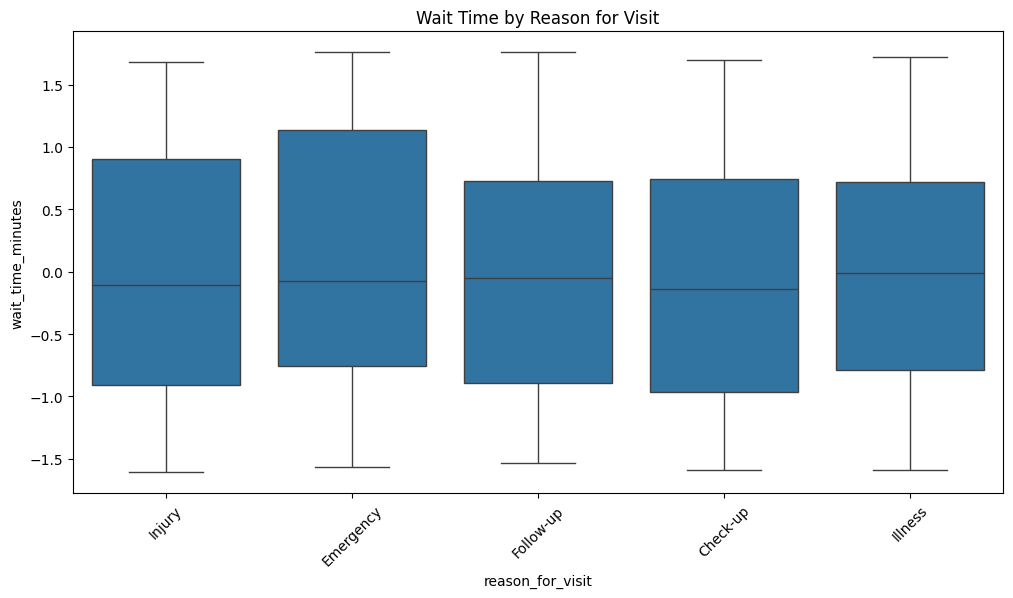

In [ ]:
# Boxplot of wait times by reason for visit
plt.figure(figsize=(12, 6))
sns.boxplot(x='reason_for_visit', y='wait_time_minutes', data=merged_data1)
plt.title('Wait Time by Reason for Visit')
plt.xticks(rotation=45)
plt.show()


##  **3. Facility Usage Optimization**

In [ ]:
# Grouping the data by equipment to see the average usage hours
average_usage = facility_usage.groupby('equipment')['usage_hours'].mean().reset_index()

# Display the average usage
print(average_usage)

    equipment  usage_hours
0     CT Scan    12.794521
1         MRI    11.347945
2  Ultrasound    11.852055
3       X-ray    12.298630


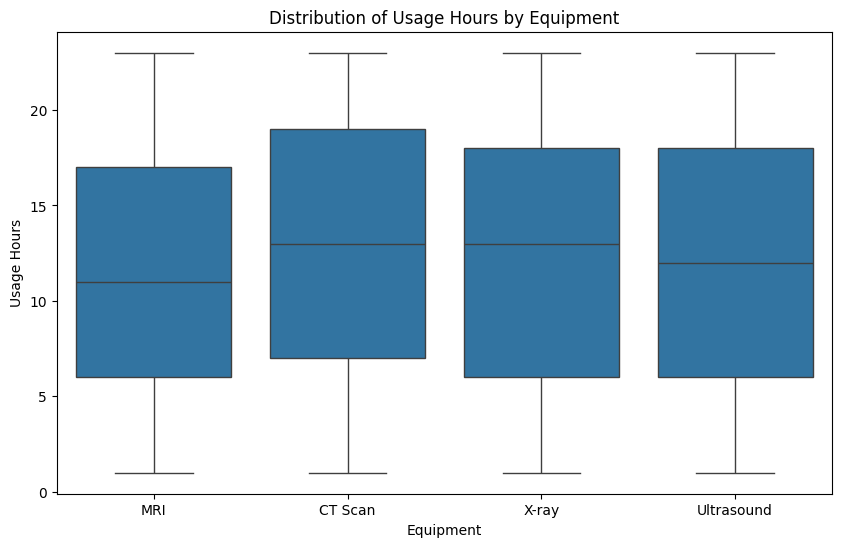

In [ ]:
# Visualizing the distribution of usage hours for different equipment
plt.figure(figsize=(10, 6))
sns.boxplot(x='equipment', y='usage_hours', data=facility_usage)
plt.title('Distribution of Usage Hours by Equipment')
plt.xlabel('Equipment')
plt.ylabel('Usage Hours')
plt.show()

###  Identifying Underutilization or Overutilization:

To identify underutilization or overutilization, we can compare the usage hours against the number of patients and types of visits. We will calculate the usage per patient and analyze the results.

In [ ]:
# Convert 'date' column in facility_usage to datetime64[ns]
facility_usage['date'] = pd.to_datetime(facility_usage['date'])

# Merge the patient_data and facility_usage on date
merged_data2 = pd.merge(patient_data, facility_usage, on='date')
merged_data2

,patient_id,age,gender,reason_for_visit,outcome,wait_time_minutes,date,equipment,usage_hours
0,13,23,Male,Injury,Admitted,16,2023-01-01,MRI,15
1,13,23,Male,Injury,Admitted,16,2023-01-01,CT Scan,22
2,13,23,Male,Injury,Admitted,16,2023-01-01,X-ray,20
3,13,23,Male,Injury,Admitted,16,2023-01-01,Ultrasound,14
4,99,52,Female,Emergency,Admitted,30,2023-01-01,MRI,15
...,...,...,...,...,...,...,...,...,...
1455,302,2,Female,Emergency,Transferred,81,2023-02-28,Ultrasound,3
1456,337,16,Female,Emergency,Discharged,179,2023-02-28,MRI,17
1457,337,16,Female,Emergency,Discharged,179,2023-02-28,CT Scan,16
1458,337,16,Female,Emergency,Discharged,179,2023-02-28,X-ray,12


In [ ]:
# Calculate usage per patient
merged_data2['usage_per_patient'] = merged_data2['usage_hours'] / merged_data2.groupby('date')['patient_id'].transform('count')

# Display the merged data with usage per patient
print(merged_data2.head())

   patient_id  age  gender reason_for_visit   outcome  wait_time_minutes  \
0          13   23    Male           Injury  Admitted                 16   
1          13   23    Male           Injury  Admitted                 16   
2          13   23    Male           Injury  Admitted                 16   
3          13   23    Male           Injury  Admitted                 16   
4          99   52  Female        Emergency  Admitted                 30   

        date   equipment  usage_hours  usage_per_patient  
0 2023-01-01         MRI           15               0.75  
1 2023-01-01     CT Scan           22               1.10  
2 2023-01-01       X-ray           20               1.00  
3 2023-01-01  Ultrasound           14               0.70  
4 2023-01-01         MRI           15               0.75  


In [ ]:
# Grouping the data by equipment and reason_for_visit to see the average usage per patient
average_usage_per_patient = merged_data2.groupby(['equipment', 'reason_for_visit'])['usage_per_patient'].mean().reset_index()

# Display the average usage per patient
print(average_usage_per_patient)

     equipment reason_for_visit  usage_per_patient
0      CT Scan         Check-up           0.499460
1      CT Scan        Emergency           0.479749
2      CT Scan        Follow-up           0.499363
3      CT Scan          Illness           0.607115
4      CT Scan           Injury           0.563339
5          MRI         Check-up           0.426503
6          MRI        Emergency           0.455717
7          MRI        Follow-up           0.408402
8          MRI          Illness           0.537268
9          MRI           Injury           0.418982
10  Ultrasound         Check-up           0.504884
11  Ultrasound        Emergency           0.502662
12  Ultrasound        Follow-up           0.403585
13  Ultrasound          Illness           0.543020
14  Ultrasound           Injury           0.454891
15       X-ray         Check-up           0.445796
16       X-ray        Emergency           0.459277
17       X-ray        Follow-up           0.379945
18       X-ray          Illness

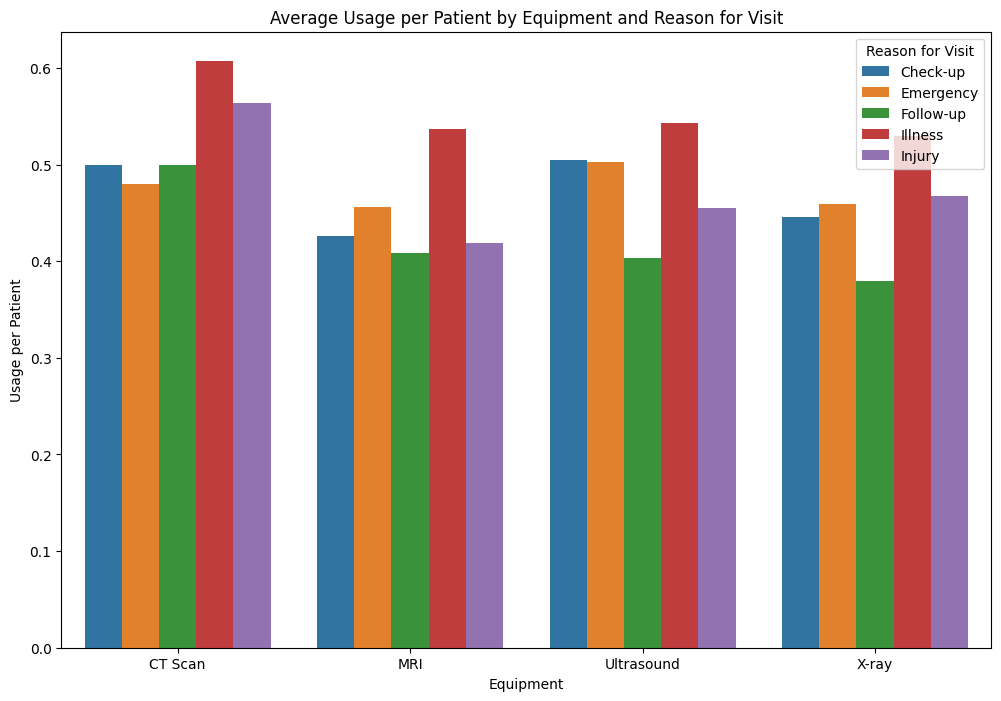

In [ ]:
# Visualizing the average usage per patient by equipment and reason_for_visit
plt.figure(figsize=(12, 8))
sns.barplot(x='equipment', y='usage_per_patient', hue='reason_for_visit', data=average_usage_per_patient)
plt.title('Average Usage per Patient by Equipment and Reason for Visit')
plt.xlabel('Equipment')
plt.ylabel('Usage per Patient')
plt.legend(title='Reason for Visit')
plt.show()


## **4. Predictive Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Merging patient inflow, staff schedule, and facility usage data
merged_data3 = pd.merge(pd.merge(daily_patient_inflow.reset_index(), staff_schedule, on='date'), facility_usage, on='date')

# Prepare the dataset for modeling
X = merged_data3[['Patient_Count', 'available_staff']]
y = merged_data3['usage_hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
y_pred

array([11.92799437, 11.52315931, 11.7869813 , 11.96983627, 11.76334356,
       11.66145559, 11.76334356, 11.72965203, 11.60412632, 11.68781012,
       11.42127135, 11.88615247, 11.7424226 , 11.80246867, 11.80790225,
       11.92799437, 11.94891532, 11.76606035, 11.64868501, 11.7869813 ,
       11.76877714, 11.56228442, 11.84974415, 11.5258761 , 11.7451394 ,
       11.76877714, 11.68781012, 11.64868501, 11.56500121, 11.76877714,
       11.82610641, 11.70873107, 11.36122528, 11.54408026, 11.56228442,
       11.78426451, 11.7451394 , 11.64596822, 11.82338962, 11.7424226 ,
       11.66145559, 11.82610641, 11.64868501, 11.66417238, 11.82610641,
       11.84974415, 11.86794831, 11.68781012, 11.54951384, 11.58863895,
       11.36122528, 11.54408026, 11.66145559, 11.80790225, 11.54136347,
       11.52315931, 11.72150165, 11.86523152, 11.66688917, 11.66145559,
       11.60140953, 11.60140953, 11.84431057, 11.54679705, 11.84702736,
       11.90979021, 11.76877714, 11.88615247, 11.86523152, 11.50

In [ ]:
# find the coeficicient
model.coef_[0]

-0.0600460616621072

In [ ]:
model.intercept_

12.25457921008953

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# r-squared value
r2 = model.score(X_test, y_test)
print(f'R-squared: {r2}')

Mean Squared Error: 45.0191631439514
R-squared: -0.008064823292995849


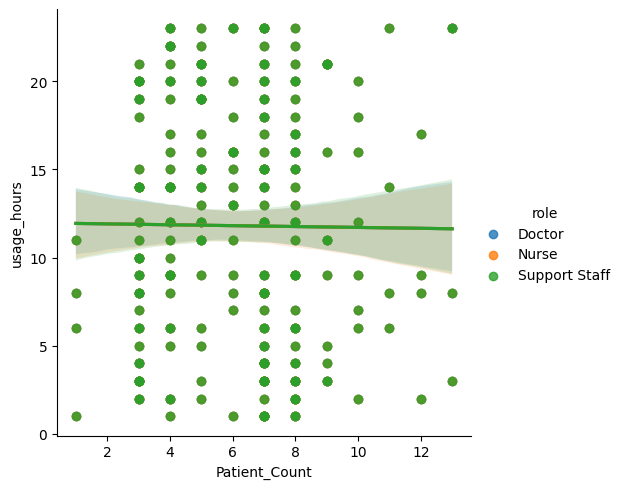

In [ ]:
# create lmplot to visualize the condtion
sns.lmplot(x = 'Patient_Count', y = 'usage_hours', data = merged_data3, hue = 'role')

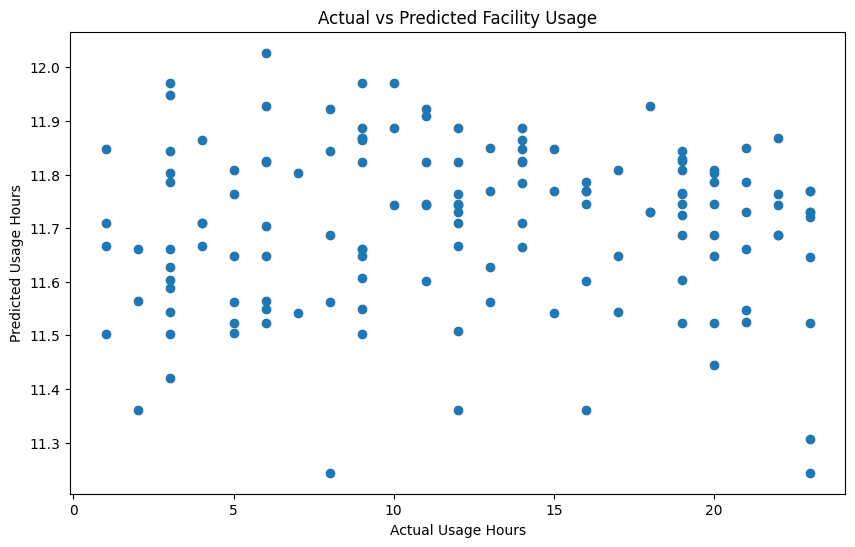

In [ ]:
# Plotting actual vs predicted usage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Usage Hours')
plt.ylabel('Predicted Usage Hours')
plt.title('Actual vs Predicted Facility Usage')
plt.show()

## **5. Resource Allocation Strategy**

 Identifying Peak Times Using Clustering

In [ ]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features = merged_data3[['Patient_Count', 'usage_hours']]


# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assume we want to identify 3 clusters
merged_data3['cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


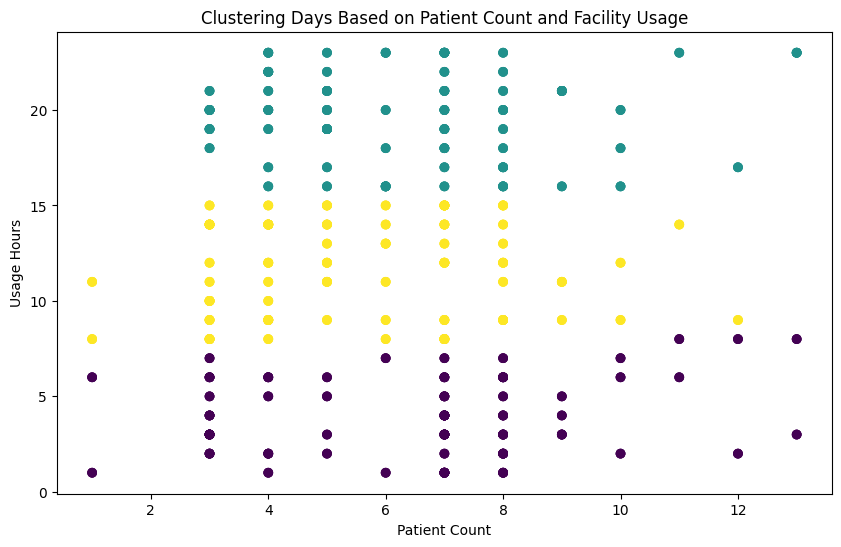

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_data3['Patient_Count'], merged_data3['usage_hours'], c=merged_data3['cluster'], cmap='viridis')
plt.title('Clustering Days Based on Patient Count and Facility Usage')
plt.xlabel('Patient Count')
plt.ylabel('Usage Hours')
plt.show()

 ### Resource Allocation Strategy

In [ ]:
# Calculate average staff and facility usage in each cluster
cluster_summary = merged_data3.groupby('cluster').agg({
    'Patient_Count': 'mean',
    'available_staff': 'mean',
    'usage_hours': 'mean'
}).reset_index()

# Round 'Patient_Count' and 'available_staff' columns
cluster_summary['Patient_Count'] = cluster_summary['Patient_Count'].round()
cluster_summary['available_staff'] = cluster_summary['available_staff'].round()

print(cluster_summary)

   cluster  Patient_Count  available_staff  usage_hours
0        0            7.0             10.0     3.881579
1        1            6.0              9.0    19.769231
2        2            6.0              9.0    11.573171


In [ ]:
# Adjusting staff based on demand
# For simplicity, let's assume we add 20% more staff during high-demand periods (cluster with highest patient count)
high_demand_cluster = cluster_summary['Patient_Count'].idxmax()
merged_data3['adjusted_staff'] = merged_data3['available_staff']

# Adding 20% more staff in high-demand cluster
merged_data3.loc[merged_data3['cluster'] == high_demand_cluster, 'adjusted_staff'] *= 1.2

print(merged_data3)

     index       date  Patient_Count           role  available_staff  \
0        0 2023-01-01              5         Doctor                8   
1        0 2023-01-01              5         Doctor                8   
2        0 2023-01-01              5         Doctor                8   
3        0 2023-01-01              5         Doctor                8   
4        0 2023-01-01              5          Nurse               10   
..     ...        ...            ...            ...              ...   
703     58 2023-02-28              8          Nurse                7   
704     58 2023-02-28              8  Support Staff                6   
705     58 2023-02-28              8  Support Staff                6   
706     58 2023-02-28              8  Support Staff                6   
707     58 2023-02-28              8  Support Staff                6   

      equipment  usage_hours  cluster  adjusted_staff  
0           MRI           15        2             8.0  
1       CT Scan        

<ipython-input-59-1c505a858317>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 6.   6.  14.4 14.4 10.8 10.8 10.8 10.8  9.6  9.6 12.  12.   8.4  8.4
 15.6 15.6 10.8 10.8  8.4  6.  16.8 12.   7.2  8.4  7.2  7.2 14.4 14.4
 15.6 15.6  8.4 10.8 14.4 16.8 16.8  8.4  8.4  9.6  9.6 15.6 15.6 13.2
 13.2  6.   6.   9.6  9.6  9.6  9.6 15.6 15.6 12.  12.  15.6 15.6 12.
 12.  12.  12.  10.8 10.8 10.8 10.8  7.2 14.4 14.4  7.2  7.2 12.  15.6
 15.6 15.6 14.4 14.4 14.4 12.  12.  12.   8.4  8.4  8.4  8.4 14.4 14.4
 14.4 14.4 15.6 15.6 15.6 15.6  6.   6.   6.  15.6 15.6 15.6 12.  12.
 12.  12.   9.6  6.  16.8 14.4  7.2  6.   7.2  6.   6.  15.6  6.   9.6
 16.8 12.  13.2 13.2  7.2  7.2 12.  12.  13.2 16.8 16.8 13.2  6.  14.4
  8.4  8.4 12.  12.  15.6 15.6 12.  12.  15.6 15.6 13.2 13.2 15.6 15.6
  7.2  7.2 14.4 14.4 14.4 14.4  7.2  7.2  9.6  9.6 13.2 13.2  9.6  9.6
  9.6  9.6 12.  12.  16.8 16.8 12.  12.  16.8  8.4 15.6 16.8  7.2 12

 ### Evaluate the Impact of the Strategy

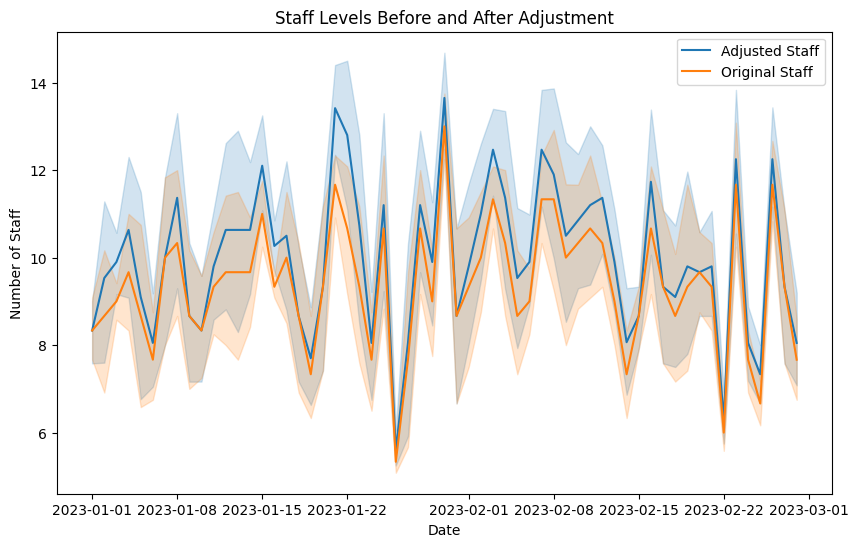

In [ ]:
import seaborn as sns

# Visualize the adjusted staff levels
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='adjusted_staff', data=merged_data3, label='Adjusted Staff')
sns.lineplot(x='date', y='available_staff', data=merged_data3, label='Original Staff')
plt.title('Staff Levels Before and After Adjustment')
plt.xlabel('Date')
plt.ylabel('Number of Staff')
plt.legend()
plt.show()

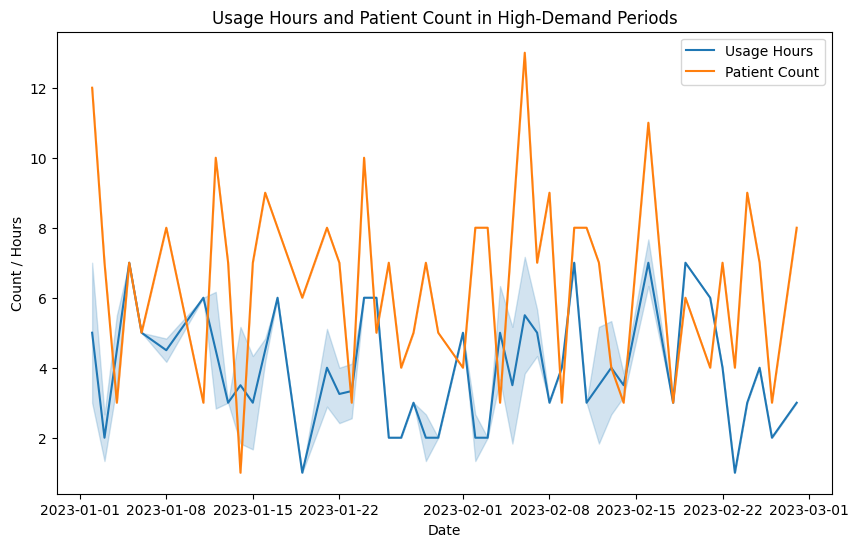

In [ ]:
# Compare usage hours and patient count in high-demand periods
high_demand_data = merged_data3[merged_data3['cluster'] == high_demand_cluster]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='usage_hours', data=high_demand_data, label='Usage Hours')
sns.lineplot(x='date', y='Patient_Count', data=high_demand_data, label='Patient Count')
plt.title('Usage Hours and Patient Count in High-Demand Periods')
plt.xlabel('Date')
plt.ylabel('Count / Hours')
plt.legend()
plt.show()

## **6. Facility Utilization Efficiency**

This will help us understand how efficiently the hospital's facilities are being used relative to the available staff.

In [ ]:
# Merge facility usage and staff schedule on 'date'
merged_data4 = pd.merge(facility_usage, staff_schedule, on='date')
merged_data4

,date,equipment,usage_hours,role,available_staff
0,2023-01-01,MRI,15,Doctor,8
1,2023-01-01,MRI,15,Nurse,10
2,2023-01-01,MRI,15,Support Staff,7
3,2023-01-01,CT Scan,22,Doctor,8
4,2023-01-01,CT Scan,22,Nurse,10
...,...,...,...,...,...
4375,2023-12-31,X-ray,21,Nurse,12
4376,2023-12-31,X-ray,21,Support Staff,9
4377,2023-12-31,Ultrasound,22,Doctor,12
4378,2023-12-31,Ultrasound,22,Nurse,12


In [ ]:
# Calculate utilization efficiency
merged_data4['utilization_efficiency'] = merged_data4['usage_hours'] / merged_data4['available_staff']
merged_data4

,date,equipment,usage_hours,role,available_staff,utilization_efficiency
0,2023-01-01,MRI,15,Doctor,8,1.875000
1,2023-01-01,MRI,15,Nurse,10,1.500000
2,2023-01-01,MRI,15,Support Staff,7,2.142857
3,2023-01-01,CT Scan,22,Doctor,8,2.750000
4,2023-01-01,CT Scan,22,Nurse,10,2.200000
...,...,...,...,...,...,...
4375,2023-12-31,X-ray,21,Nurse,12,1.750000
4376,2023-12-31,X-ray,21,Support Staff,9,2.333333
4377,2023-12-31,Ultrasound,22,Doctor,12,1.833333
4378,2023-12-31,Ultrasound,22,Nurse,12,1.833333


In [ ]:
# Group by equipment and role to find average utilization efficiency
avg_efficiency = merged_data4.groupby(['equipment', 'role'])['utilization_efficiency'].mean().reset_index()

# Sort the results for better visualization
avg_efficiency = avg_efficiency.sort_values(by='utilization_efficiency', ascending=False)


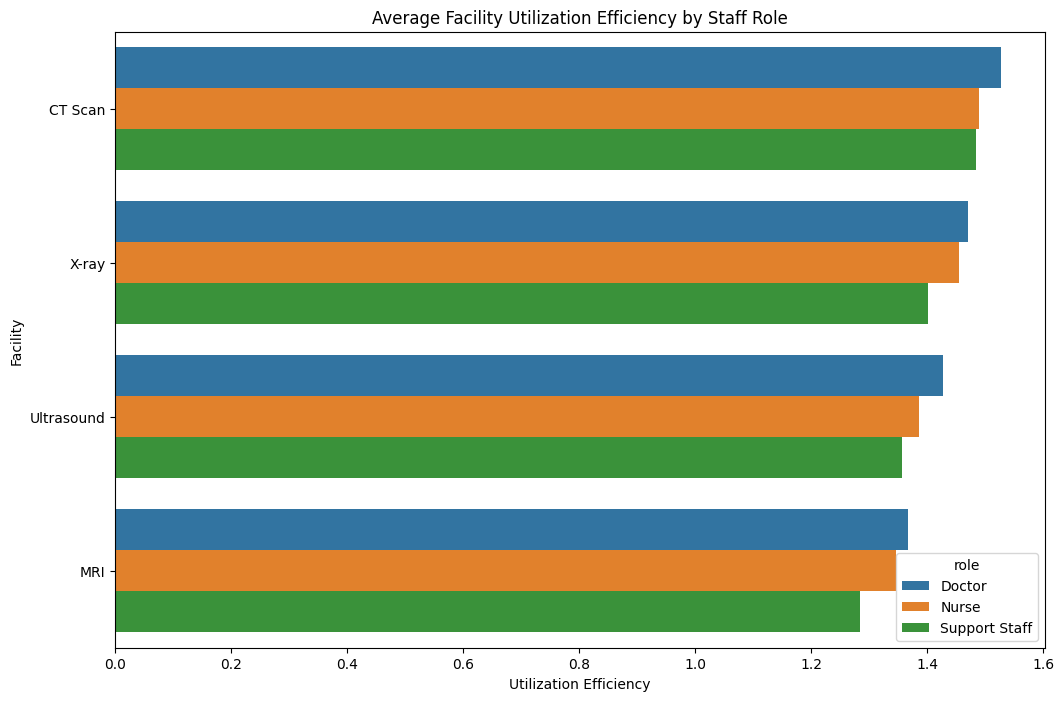

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot to visualize average utilization efficiency
sns.barplot(x='utilization_efficiency', y='equipment', hue='role', data=avg_efficiency)

# Add title and labels
plt.title('Average Facility Utilization Efficiency by Staff Role')
plt.xlabel('Utilization Efficiency')
plt.ylabel('Facility')

# Show the plot
plt.show()
